## k-means for tree clustering 

#### Based on https://mubaris.com/posts/kmeans-clustering/

In [2]:
# Some settings
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
plt.rcParams['figure.figsize'] = (20,20 )
plt.style.use('ggplot')

In [3]:
# Importing the dataset
data = pd.read_csv('UNIL_points.csv')
#data = pd.read_csv('EPFL_trees_LESO.csv')
print(data.shape)
data.head()

(634264, 5)


,OBJECTID,pointid,grid_code,POINT_X,POINT_Y
0,5,345,3.9,533945.8,153251.8
1,6,346,5.2,533946.3,153251.8
2,7,347,4.1,533946.8,153251.8
3,8,348,7.1,533947.8,153251.8
4,9,349,5.6,533966.8,153251.8


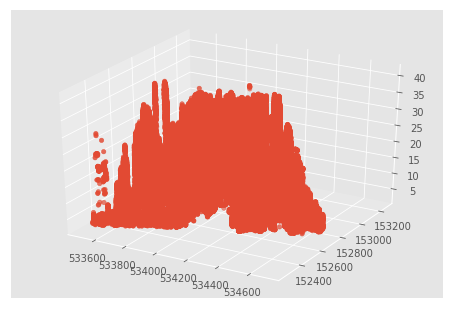

In [6]:
# Getting the values and plotting it
f1 = data['POINT_X'].values
f2 = data['POINT_Y'].values
#f3_b=data['grid_code'].where()
f3 = data['grid_code'].values
X = np.array(list(zip(f1, f2,f3)))
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2])

In [7]:
len(data['POINT_X'])
kmeans = KMeans(n_clusters=int(len(data['POINT_X'])*0.25/10000*65))
print(kmeans.n_clusters)

1030


In [8]:
int(len(data['POINT_X'])*0.25/10000*85)

1347

# Optimization of stand density index

In [ ]:
# vegetation density index vector to find the optimal one
trees_SSE=[]
stand_index=[10,50,70,80]
#stand_index=[10,50,70,150] #n trees/hectars

for i in stand_index:
    # Initializing KMeans
    kmeans = KMeans(n_clusters=int(len(data['POINT_X'])*0.25/10000*i))
    # Fitting with inputs
    kmeans = kmeans.fit(X)
    # Predicting the clusters
    labels = kmeans.predict(X)
    # Getting the cluster centers
    C = kmeans.cluster_centers_
    #reporting 
    trees_SSE.append(kmeans.inertia_)
print(trees_SSE)

#fixed SDI

In [ ]:
# Initializing KMeans
kmeans = KMeans(n_clusters=5)
#kmeans = KMeans(n_clusters=int(len(data['POINT_X'])*0.25/10000*85))
# Fitting with inputs
kmeans = kmeans.fit(X)
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_

In [ ]:
print(C)
print(labels)

In [ ]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2])
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*',c='#050505',s=1000)

In [ ]:
area=np.zeros(kmeans.n_clusters)
heights=np.zeros(kmeans.n_clusters)
for i in range(kmeans.n_clusters):
    #print(i)
    x=np.where(labels == i)
    #print(x[0].size)
    #print(x[0])
    #print(X[x, 2][0])
    heights[i]=np.amax(X[x, 2])
    area[i]=(x[0].size)*0.25 ## already in m2
    #diameter


In [ ]:
fig = plt.figure()
plt.scatter(X[:, 0], X[:, 1])
#plt.scatter(C[:, 0], C[:, 1],marker='*',s=1000)
#colors = C[:, 2]
#area = np.pi * (15 * np.random.rand(N))**2  # 0 to 15 point radii
colors = np.random.rand(50)
plt.scatter(C[:, 0], C[:, 1], s=area*10, alpha=0.5)
#plt.scatter(C[:, 0], C[:, 1], s=1000, alpha=0.5)

In [ ]:
# output file of trees: X, Y, Z, max_Z, area

h1 = C[:,0]
h2 = C[:,1]
h3 = C[:,2]
h4 = heights
h5 = area

total_trees = np.array(list(zip(h1,h2,h3,h4,h5)))

dataframe = pd.DataFrame(total_trees)
dataframe.to_csv('UNIL_total_trees.csv', sep=' ', header=False, float_format='%.2f', index=False)